In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR10
from torchvision.models import resnet18, efficientnet_b0, mobilenet_v2

In [3]:
# Set the device (GPU if available)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# 1. Data Preparation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
# Number of epochs for each model and optimizer combination
epochs_resnet = 17
epochs_efficientnet = 15
epochs_alexnet = 22
epochs_mobilenet = 19

# Data augmentation and normalization for each model
transform_resnet = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_efficientnet = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_alexnet = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_mobilenet = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=5),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

Files already downloaded and verified

Running ResNet-18_sgd_dropout_0.2...
Epoch [1/17], Train Loss: 1.4711, Train Accuracy: 0.5030, Validation Loss: 1.2667, Validation Accuracy: 0.5775
Epoch [2/17], Train Loss: 1.0994, Train Accuracy: 0.6236, Validation Loss: 1.0189, Validation Accuracy: 0.6529
Epoch [3/17], Train Loss: 0.9629, Train Accuracy: 0.6651, Validation Loss: 0.9095, Validation Accuracy: 0.6816
Epoch [4/17], Train Loss: 0.9610, Train Accuracy: 0.6699, Validation Loss: 1.0830, Validation Accuracy: 0.6184
Epoch [5/17], Train Loss: 0.9100, Train Accuracy: 0.6860, Validation Loss: 0.8301, Validation Accuracy: 0.7105
Epoch [6/17], Train Loss: 0.9193, Train Accuracy: 0.6842, Validation Loss: 0.8683, Validation Accuracy: 0.7054
Epoch [7/17], Train Loss: 0.8676, Train Accuracy: 0.7007, Validation Loss: 0.8747, Validation Accuracy: 0.6993
Epoch [8/17], Train Loss: 0.8666, Train Accuracy: 0.7011, Validation Loss: 1.0484, Validation Accuracy: 0.6357
Epoch [9/17], Train Loss: 0.8156, Tr

Epoch [5/17], Train Loss: 1.8690, Train Accuracy: 0.3510, Validation Loss: 1.7764, Validation Accuracy: 0.3698
Epoch [6/17], Train Loss: 1.7014, Train Accuracy: 0.4012, Validation Loss: 1.5988, Validation Accuracy: 0.4360
Epoch [7/17], Train Loss: 1.5606, Train Accuracy: 0.4407, Validation Loss: 1.6628, Validation Accuracy: 0.4327
Epoch [8/17], Train Loss: 1.4950, Train Accuracy: 0.4625, Validation Loss: 1.4484, Validation Accuracy: 0.4730
Epoch [9/17], Train Loss: 1.5274, Train Accuracy: 0.4469, Validation Loss: 1.4551, Validation Accuracy: 0.4842
Epoch [10/17], Train Loss: 1.3654, Train Accuracy: 0.5110, Validation Loss: 1.3223, Validation Accuracy: 0.5193
Epoch [11/17], Train Loss: 1.2987, Train Accuracy: 0.5353, Validation Loss: 1.3091, Validation Accuracy: 0.5472
Epoch [12/17], Train Loss: 1.2901, Train Accuracy: 0.5419, Validation Loss: 1.2852, Validation Accuracy: 0.5479
Epoch [13/17], Train Loss: 1.2660, Train Accuracy: 0.5528, Validation Loss: 1.2280, Validation Accuracy: 0.55

/Users/vaibhav/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Running EfficientNet-B0_sgd_dropout_0.2...
Epoch [1/15], Train Loss: 1.7096, Train Accuracy: 0.3905, Validation Loss: 1.3343, Validation Accuracy: 0.5287
Epoch [2/15], Train Loss: 1.1746, Train Accuracy: 0.5858, Validation Loss: 0.9720, Validation Accuracy: 0.6592
Epoch [3/15], Train Loss: 0.9859, Train Accuracy: 0.6572, Validation Loss: 0.8837, Validation Accuracy: 0.6892
Epoch [4/15], Train Loss: 0.8653, Train Accuracy: 0.7002, Validation Loss: 0.7769, Validation Accuracy: 0.7325
Epoch [5/15], Train Loss: 0.7936, Train Accuracy: 0.7233, Validation Loss: 0.7341, Validation Accuracy: 0.7410
Epoch [6/15], Train Loss: 0.7460, Train Accuracy: 0.7397, Validation Loss: 0.6868, Validation Accuracy: 0.7582
Epoch [7/15], Train Loss: 0.6981, Train Accuracy: 0.7593, Validation Loss: 0.6813, Validation Accuracy: 0.7592
Epoch [8/15], Train Loss: 0.6889, Train Accuracy: 0.7611, Validation Loss: 0.6872, Validation Accuracy: 0.7596
Epoch [9/15], Train Loss: 0.6596, Train Accuracy: 0.7671, Validation

Epoch [13/15], Train Loss: 0.6743, Train Accuracy: 0.7668, Validation Loss: 0.6579, Validation Accuracy: 0.7744
Epoch [14/15], Train Loss: 0.6576, Train Accuracy: 0.7747, Validation Loss: 0.6502, Validation Accuracy: 0.7727
Epoch [15/15], Train Loss: 0.6442, Train Accuracy: 0.7780, Validation Loss: 0.6714, Validation Accuracy: 0.7645

Running EfficientNet-B0_adam_dropout_0.5...
Epoch [1/15], Train Loss: 1.2926, Train Accuracy: 0.5503, Validation Loss: 0.9066, Validation Accuracy: 0.6922
Epoch [2/15], Train Loss: 0.8955, Train Accuracy: 0.6926, Validation Loss: 0.8134, Validation Accuracy: 0.7205
Epoch [3/15], Train Loss: 0.8056, Train Accuracy: 0.7238, Validation Loss: 0.7736, Validation Accuracy: 0.7319
Epoch [4/15], Train Loss: 0.7810, Train Accuracy: 0.7326, Validation Loss: 0.7458, Validation Accuracy: 0.7476
Epoch [5/15], Train Loss: 0.7565, Train Accuracy: 0.7383, Validation Loss: 0.7377, Validation Accuracy: 0.7453
Epoch [6/15], Train Loss: 0.7334, Train Accuracy: 0.7477, Valida

Epoch [11/22], Train Loss: 1.0094, Train Accuracy: 0.6403, Validation Loss: 0.9723, Validation Accuracy: 0.6574
Epoch [12/22], Train Loss: 0.9546, Train Accuracy: 0.6617, Validation Loss: 0.9215, Validation Accuracy: 0.6780
Epoch [13/22], Train Loss: 0.9031, Train Accuracy: 0.6836, Validation Loss: 0.9159, Validation Accuracy: 0.6821
Epoch [14/22], Train Loss: 0.8681, Train Accuracy: 0.6946, Validation Loss: 0.8588, Validation Accuracy: 0.7079
Epoch [15/22], Train Loss: 0.8177, Train Accuracy: 0.7164, Validation Loss: 0.8536, Validation Accuracy: 0.7092
Epoch [16/22], Train Loss: 0.7916, Train Accuracy: 0.7260, Validation Loss: 0.8115, Validation Accuracy: 0.7152
Epoch [17/22], Train Loss: 0.7601, Train Accuracy: 0.7360, Validation Loss: 0.7812, Validation Accuracy: 0.7310
Epoch [18/22], Train Loss: 0.7286, Train Accuracy: 0.7498, Validation Loss: 0.7957, Validation Accuracy: 0.7249
Epoch [19/22], Train Loss: 0.7090, Train Accuracy: 0.7533, Validation Loss: 0.7712, Validation Accuracy:

Epoch [18/22], Train Loss: 0.9362, Train Accuracy: 0.6827, Validation Loss: 0.9704, Validation Accuracy: 0.6729
Epoch [19/22], Train Loss: 0.9260, Train Accuracy: 0.6846, Validation Loss: 0.8914, Validation Accuracy: 0.7024
Epoch [20/22], Train Loss: 0.9169, Train Accuracy: 0.6891, Validation Loss: 0.9144, Validation Accuracy: 0.6954
Epoch [21/22], Train Loss: 0.9072, Train Accuracy: 0.6938, Validation Loss: 0.9189, Validation Accuracy: 0.6890
Epoch [22/22], Train Loss: 0.8980, Train Accuracy: 0.6977, Validation Loss: 0.9300, Validation Accuracy: 0.6806
Files already downloaded and verified


/Users/vaibhav/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Running MobileNetV2_sgd_dropout_0.2...
Epoch [1/19], Train Loss: 2.2165, Train Accuracy: 0.2296, Validation Loss: 2.5630, Validation Accuracy: 0.1499
Epoch [2/19], Train Loss: 2.3239, Train Accuracy: 0.1826, Validation Loss: 2.1617, Validation Accuracy: 0.1949
Epoch [3/19], Train Loss: 2.3970, Train Accuracy: 0.1421, Validation Loss: 2.2522, Validation Accuracy: 0.1299
Epoch [4/19], Train Loss: 2.3229, Train Accuracy: 0.1671, Validation Loss: 2.2834, Validation Accuracy: 0.1393
Epoch [5/19], Train Loss: 2.2824, Train Accuracy: 0.1815, Validation Loss: 2.0671, Validation Accuracy: 0.2332
Epoch [6/19], Train Loss: 2.2863, Train Accuracy: 0.1651, Validation Loss: 2.2114, Validation Accuracy: 0.1590
Epoch [7/19], Train Loss: 2.2649, Train Accuracy: 0.1584, Validation Loss: 2.2488, Validation Accuracy: 0.1653
Epoch [8/19], Train Loss: 2.1244, Train Accuracy: 0.1948, Validation Loss: 2.0090, Validation Accuracy: 0.2303
Epoch [9/19], Train Loss: 2.0793, Train Accuracy: 0.2197, Validation Los

Epoch [17/19], Train Loss: 0.6614, Train Accuracy: 0.7769, Validation Loss: 0.6459, Validation Accuracy: 0.7799
Epoch [18/19], Train Loss: 0.6640, Train Accuracy: 0.7733, Validation Loss: 0.6429, Validation Accuracy: 0.7849
Epoch [19/19], Train Loss: 0.6528, Train Accuracy: 0.7774, Validation Loss: 0.6736, Validation Accuracy: 0.7704

Running MobileNetV2_sgd_dropout_0.5...
Epoch [1/19], Train Loss: 2.6214, Train Accuracy: 0.1453, Validation Loss: 2.2662, Validation Accuracy: 0.1412
Epoch [2/19], Train Loss: 2.6018, Train Accuracy: 0.1202, Validation Loss: 3.5848, Validation Accuracy: 0.1099
Epoch [3/19], Train Loss: 2.4614, Train Accuracy: 0.1537, Validation Loss: 2.3335, Validation Accuracy: 0.1792
Epoch [4/19], Train Loss: 2.4179, Train Accuracy: 0.1750, Validation Loss: 2.3438, Validation Accuracy: 0.1609
Epoch [5/19], Train Loss: 2.4753, Train Accuracy: 0.1472, Validation Loss: 2.3830, Validation Accuracy: 0.1453
Epoch [6/19], Train Loss: 2.4635, Train Accuracy: 0.1430, Validation 

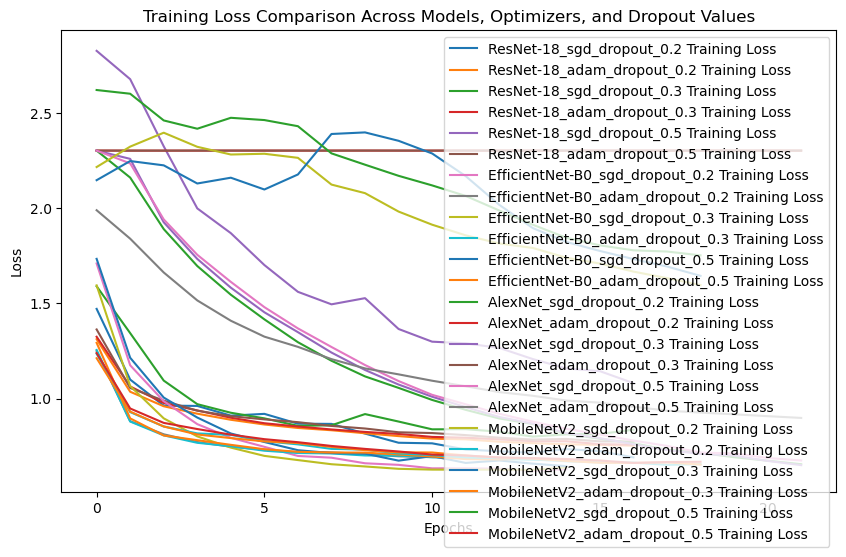

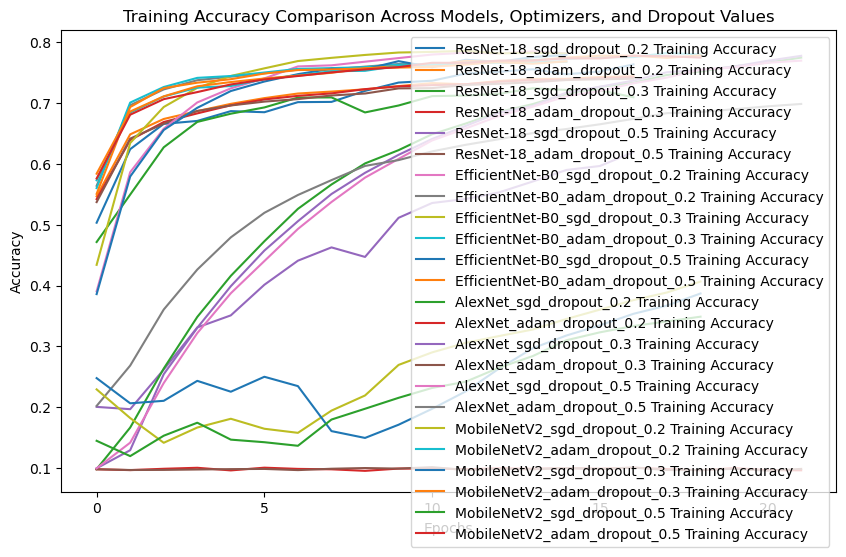

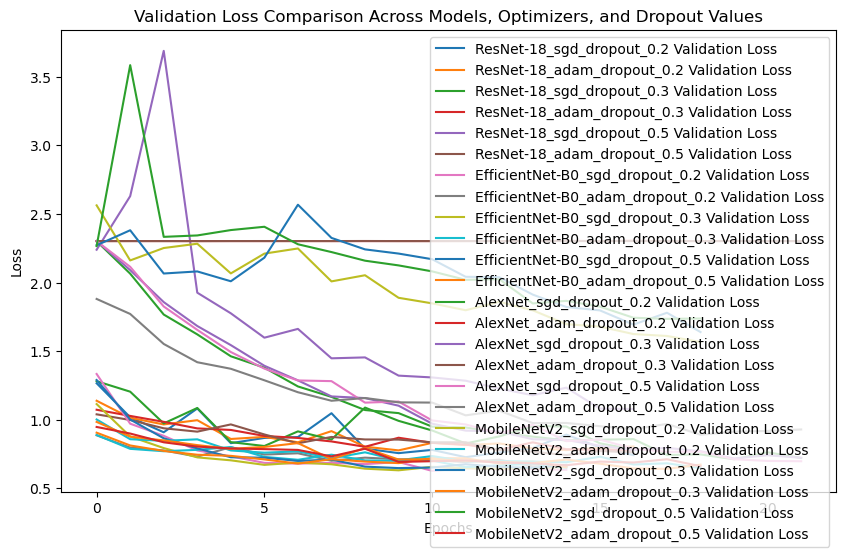

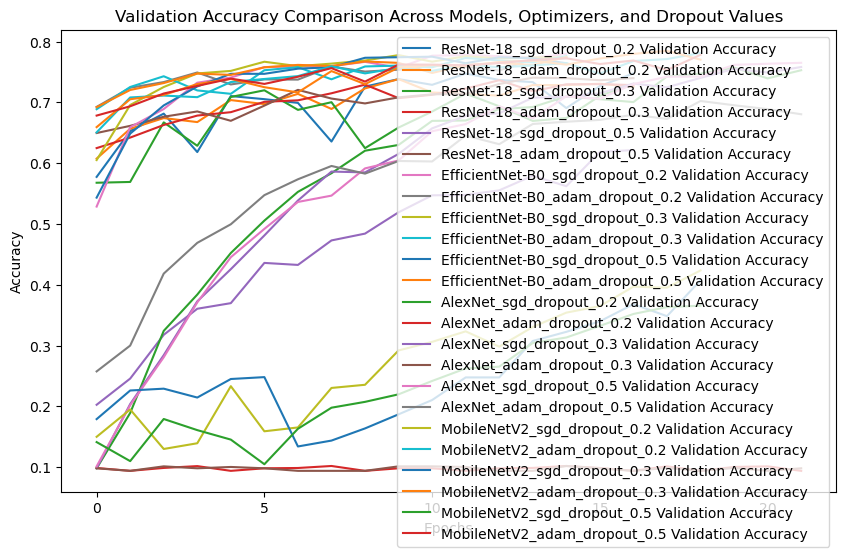

In [5]:

# Split the CIFAR-10 dataset for each model
def get_data_loaders(transform, batch_size=64):
    dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader

# Define each model class with a configurable dropout rate
class ResNet18Modified(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(ResNet18Modified, self).__init__()
        self.resnet = resnet18(pretrained=True)
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Dropout(p=dropout_rate),
            nn.Linear(in_features, 10)
        )

    def forward(self, x):
        return self.resnet(x)

class EfficientNetB0Modified(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(EfficientNetB0Modified, self).__init__()
        self.efficientnet = efficientnet_b0(pretrained=True)
        in_features = self.efficientnet.classifier[1].in_features
        self.efficientnet.classifier = nn.Sequential(
            nn.Dropout(p=dropout_rate),
            nn.Linear(in_features, 10)
        )

    def forward(self, x):
        return self.efficientnet(x)

class AlexNetModified(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(AlexNetModified, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout_rate),
            nn.Linear(512 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

class MobileNetV2Modified(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(MobileNetV2Modified, self).__init__()
        self.mobilenet = mobilenet_v2(pretrained=True)
        in_features = self.mobilenet.classifier[1].in_features
        self.mobilenet.classifier = nn.Sequential(
            nn.Dropout(p=dropout_rate),
            nn.Linear(in_features, 10)
        )

    def forward(self, x):
        return self.mobilenet(x)

# Function to train and evaluate the model with detailed print statements
def train_and_evaluate(model, train_loader, val_loader, epochs, learning_rate, optimizer_type, key):
    criterion = nn.CrossEntropyLoss()
    weight_decay = 0.001
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay) if optimizer_type == 'sgd' else optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    print(f"\nRunning {key}...")
    for epoch in range(epochs):
        # Training
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        
        # Validation
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss /= len(val_loader)
        val_accuracy = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Print progress for each epoch
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Run experiments for each model with both optimizers and three dropout values
results = {}
dropout_values = [0.2, 0.3, 0.5]

models = {
    "ResNet-18": (ResNet18Modified, transform_resnet, epochs_resnet),
    "EfficientNet-B0": (EfficientNetB0Modified, transform_efficientnet, epochs_efficientnet),
    "AlexNet": (AlexNetModified, transform_alexnet, epochs_alexnet),
    "MobileNetV2": (MobileNetV2Modified, transform_mobilenet, epochs_mobilenet)
         }

for model_name, (model_class, transform, epochs) in models.items():
    train_loader, val_loader = get_data_loaders(transform)
    for dropout_rate in dropout_values:
        for optimizer_type in ['sgd', 'adam']:
            key = f"{model_name}_{optimizer_type}_dropout_{dropout_rate}"
            model = model_class(dropout_rate=dropout_rate).to(device)
            learning_rate = 0.01 if optimizer_type == 'sgd' else 0.001
            results[key] = train_and_evaluate(
                model, train_loader, val_loader, epochs, learning_rate, optimizer_type, key
            )

# Plotting Comparison for All Models with Both Optimizers and Different Dropout Values
plt.figure(figsize=(10, 6))

# Plotting Training Loss for each model, optimizer, and dropout value
for model_optimizer_dropout, metrics in results.items():
    plt.plot(metrics[0], label=f"{model_optimizer_dropout} Training Loss")

plt.title('Training Loss Comparison Across Models, Optimizers, and Dropout Values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

# Plotting Training Accuracy for each model, optimizer, and dropout value
for model_optimizer_dropout, metrics in results.items():
    plt.plot(metrics[2], label=f"{model_optimizer_dropout} Training Accuracy")

plt.title('Training Accuracy Comparison Across Models, Optimizers, and Dropout Values')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

# Plotting Validation Loss for each model, optimizer, and dropout value
for model_optimizer_dropout, metrics in results.items():
    plt.plot(metrics[1], label=f"{model_optimizer_dropout} Validation Loss")

plt.title('Validation Loss Comparison Across Models, Optimizers, and Dropout Values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

# Plotting Validation Accuracy for each model, optimizer, and dropout value
for model_optimizer_dropout, metrics in results.items():
    plt.plot(metrics[3], label=f"{model_optimizer_dropout} Validation Accuracy")

plt.title('Validation Accuracy Comparison Across Models, Optimizers, and Dropout Values')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

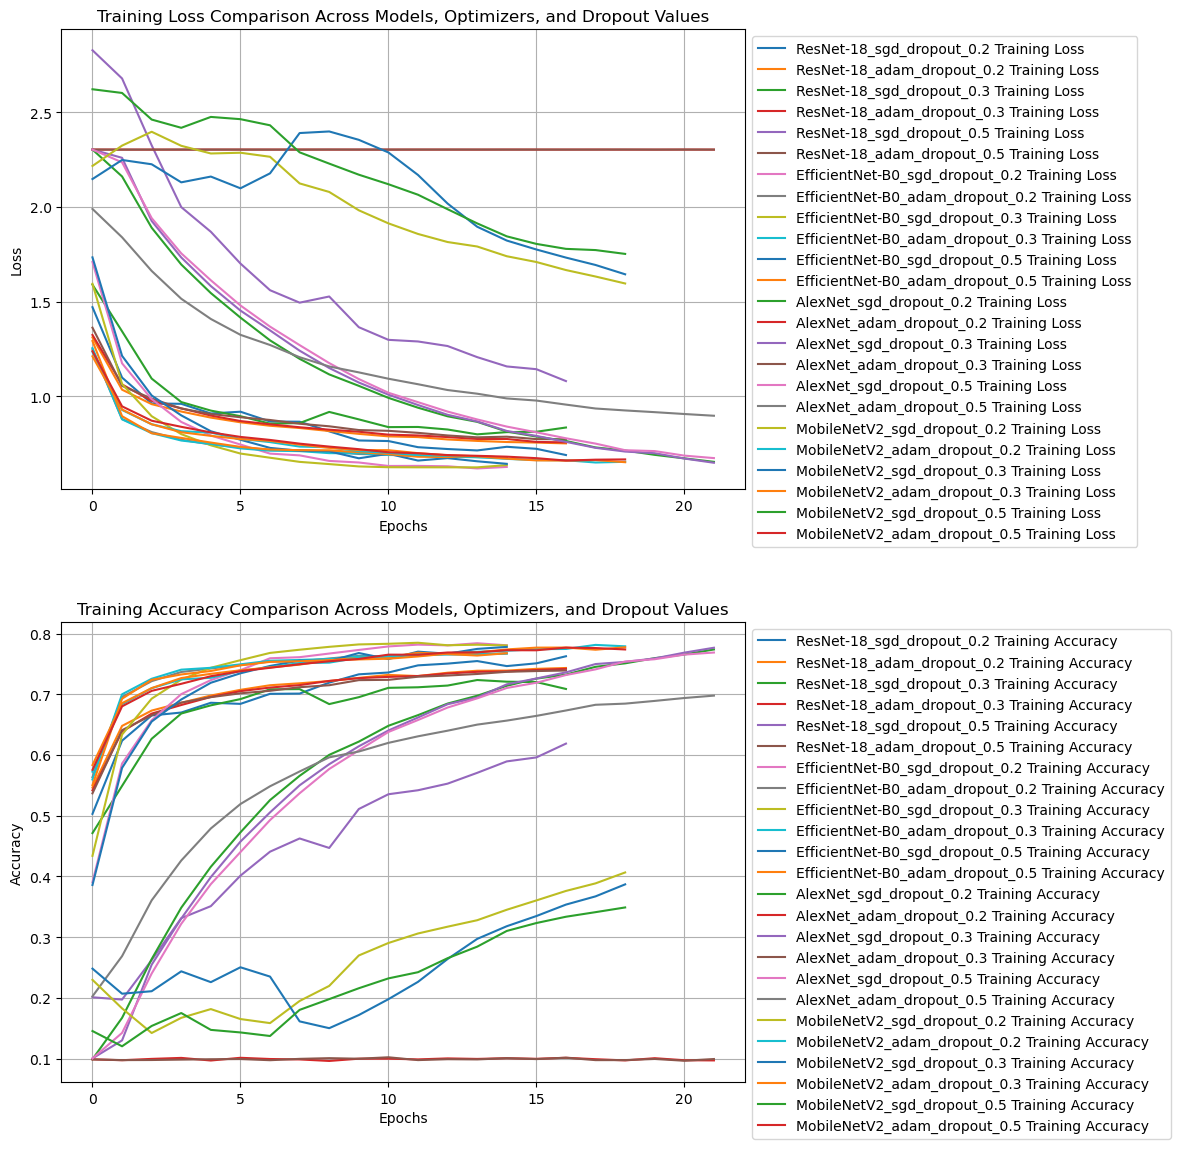

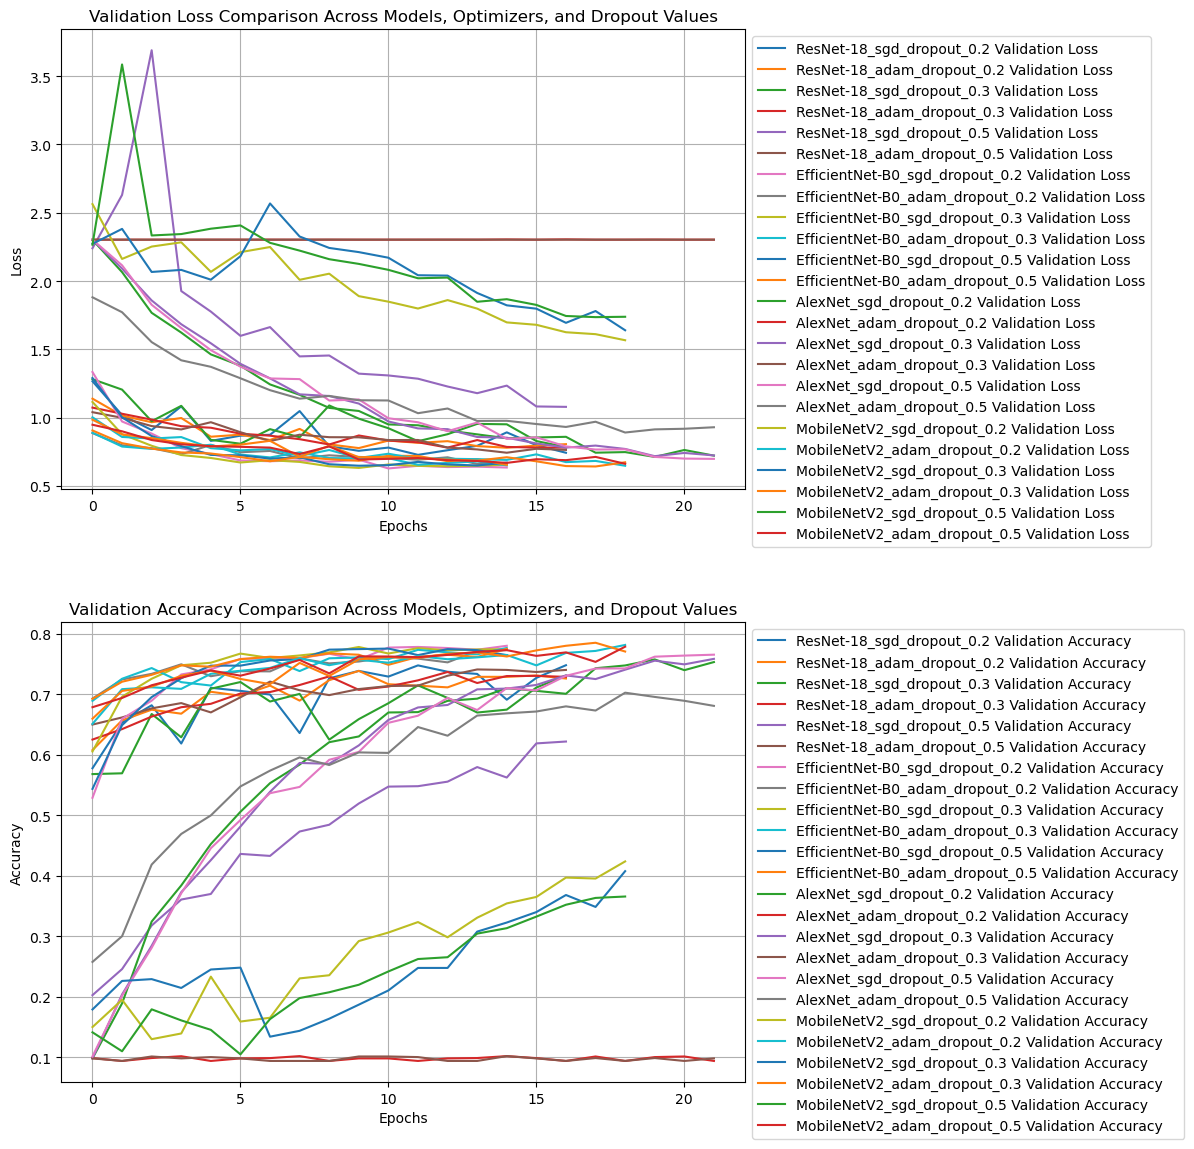

In [9]:
import matplotlib.pyplot as plt

# Assuming 'results' is a dictionary containing your metrics

# Create subplots for Training Loss and Training Accuracy
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plotting Training Loss
for model_optimizer_dropout, metrics in results.items():
    axs[0].plot(metrics[0], label=f"{model_optimizer_dropout} Training Loss")
axs[0].set_title('Training Loss Comparison Across Models, Optimizers, and Dropout Values')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[0].grid()

# Plotting Training Accuracy
for model_optimizer_dropout, metrics in results.items():
    axs[1].plot(metrics[2], label=f"{model_optimizer_dropout} Training Accuracy")
axs[1].set_title('Training Accuracy Comparison Across Models, Optimizers, and Dropout Values')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].grid()

# Adjust layout to make room for legends
plt.tight_layout()
plt.subplots_adjust(right=0.75)  # Adjust the right margin

# Save the figure
plt.savefig('training_comparison.png', bbox_inches='tight')  # Save as PNG
plt.show()

# Create subplots for Validation Loss and Validation Accuracy
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plotting Validation Loss
for model_optimizer_dropout, metrics in results.items():
    axs[0].plot(metrics[1], label=f"{model_optimizer_dropout} Validation Loss")
axs[0].set_title('Validation Loss Comparison Across Models, Optimizers, and Dropout Values')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[0].grid()

# Plotting Validation Accuracy
for model_optimizer_dropout, metrics in results.items():
    axs[1].plot(metrics[3], label=f"{model_optimizer_dropout} Validation Accuracy")
axs[1].set_title('Validation Accuracy Comparison Across Models, Optimizers, and Dropout Values')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].grid()

# Adjust layout to make room for legends
plt.tight_layout()
plt.subplots_adjust(right=0.75)  # Adjust the right margin

# Save the figure
plt.savefig('validation_comparison.png', bbox_inches='tight')  # Save as PNG
plt.show()